## Sign Language 

PCA reading material: ISLR p373-385.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import decomposition
from sklearn.linear_model import RidgeCV

In [ ]:
import time
import os
print(os.listdir("data"))
import warnings
warnings.filterwarnings('ignore')

## Data Manipulation

In [8]:
x_load = np.load('X.npy')
y_load = np.load('Y.npy')
img_size = 64

In [10]:
x_load.shape

(2062, 64, 64)

In [11]:
y_load.shape

(2062, 10)

## Data Visualization

In [71]:
# one sample from each digits

def plotSign(ind, num):
    
    plt.imshow(x_load[ind].reshape(img_size, img_size)) 
    plt.axis('off')
    title = "Sign " + str(num) 
    plt.title(title)

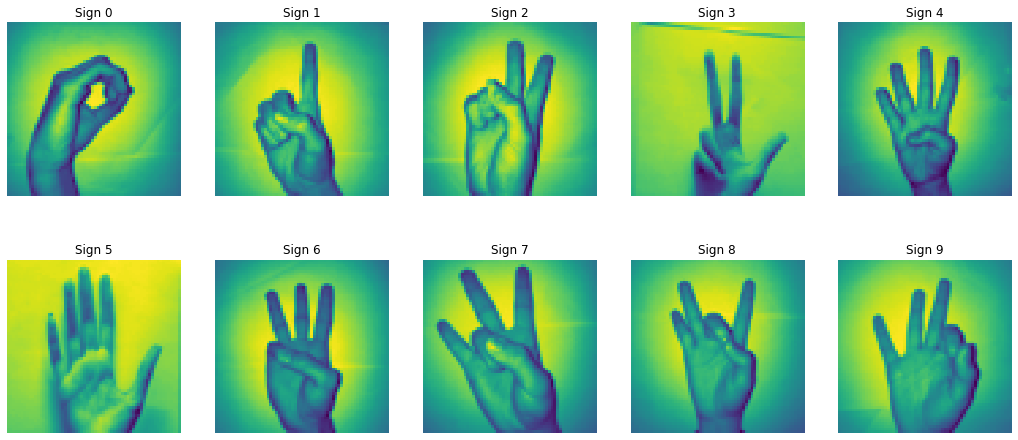

In [85]:
plt.figure(figsize=(18, 8))  

image_index_list = [260, 900, 1800, 1600, 1400, 2061, 700, 500, 1111, 100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plotSign(image_index_list[i], i)

plt.show()

## Data Preperision

In [120]:
# As a training set we will use all images except the above ones.
# As a test set we will choose ten images above.

X = x_load.reshape((len(x_load), -1)) 
T = list(X)

for ele in sorted(image_index_list, reverse = True):  
    del T[ele] 
    
train = np.array(T).reshape(((len(x_load) - len( image_index_list)), -1))
test = X[image_index_list]

n_pixels = X.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]

# Lower half of the faces
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2052, 2048)
(2052, 2048)
(10, 2048)
(10, 2048)


## Ridge CV

Print the training and prediction time

In [121]:
# Fit estimators

estimator = RidgeCV()

start = time.time()   # returns in second
estimator.fit(X_train, y_train)
end = time.time()
print("Training time is "+ str(end - start) + " second.")

start = time.time()   # returns in second
y_test_predict = estimator.predict(X_test)
end = time.time()
print("Prediction time is "+ str(end - start) + " second.")

Training time is 12.55895709991455 second.
Prediction time is 0.01088094711303711 second.


Visualize complete testing images

In [137]:
# one sample from testing data

temp = np.hstack((X_test, y_test_predict))

def plotSign_test(ind, num):
    
    plt.imshow(temp[ind].reshape(img_size, img_size)) 
    plt.axis('off')
    title = "Sign " + str(num) 
    plt.title(title)

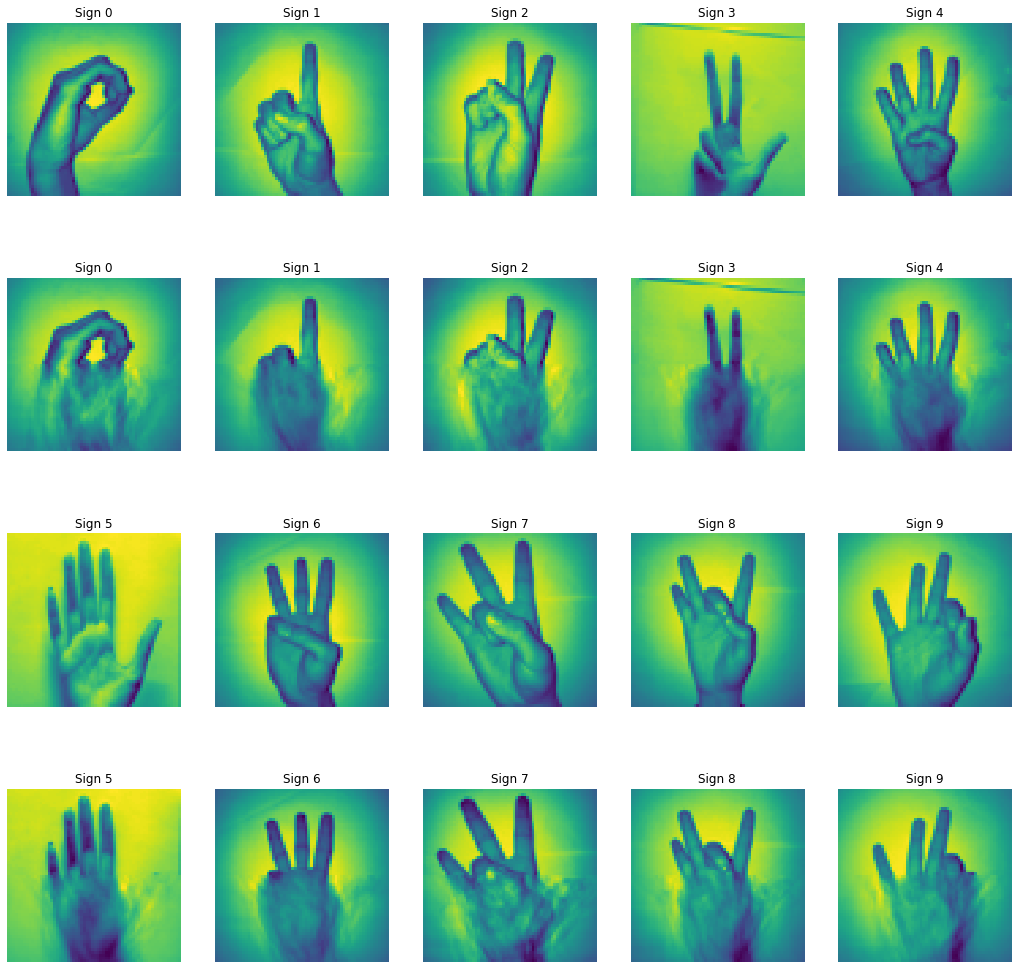

In [139]:
plt.figure(figsize=(18, 18)) 

image_index_list = [260, 900, 1800, 1600, 1400, 2061, 700, 500, 1111, 100]

for i in range(5):
    plt.subplot(4, 5, i + 1)
    plotSign(image_index_list[i], i)
    
for i in range(5):
    plt.subplot(4, 5, i + 6)
    plotSign_test(i, i)    
    
for i in range(5):
    plt.subplot(4, 5, i + 11)
    plotSign(image_index_list[i + 5], i + 5)   
    
for i in range(5):
    plt.subplot(4, 5, i + 16)
    plotSign_test(i + 5, i + 5)    

plt.show()

## PCA

Ways to decrease time spend in ridgeCV:

$\cdot$ Decrease number of sample (Not recommend). Number of sample(2062) and number of feature(4096).

$\cdot$ Decrease number of features. (PCA)

PCA procedure below is a little different from its regular usage. For all data, we are coming up with a weight vector to average among 2062 observations and use one figure to track the priciple information of all figures.

### Number 1 - sample size: 100

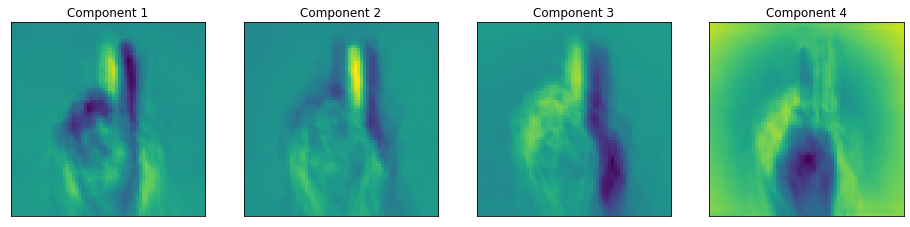

In [227]:
n_components = 4

(n_samples, n_features) = X.shape

estimator = decomposition.PCA(n_components = n_components, svd_solver = 'randomized', whiten = True)
estimator.fit(X[901: 1000])

images = estimator.components_

plt.figure(figsize = (16, 6))

for i, comp in enumerate(images):
   
    plt.subplot(1, 4, 4 - i)  
    vmax = max(comp.max(), - comp.min())
    plt.imshow(comp.reshape((img_size, img_size)), interpolation = 'nearest', vmin = -vmax, vmax = vmax)  # 
    plt.xticks(())
    plt.yticks(())
    title = "Component " + str(4 - i) 
    plt.title(title)

plt.show()

### All data

<Figure size 1152x576 with 0 Axes>

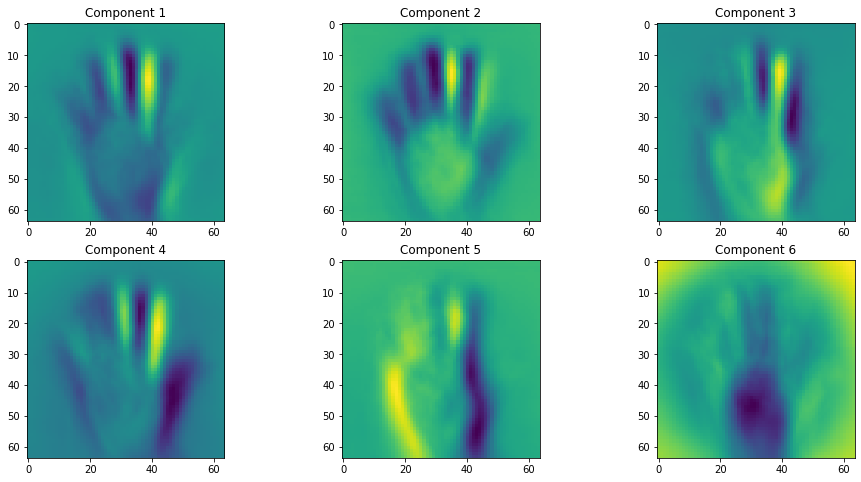

In [229]:
n_components = 6

(n_samples, n_features) = X.shape

estimator = decomposition.PCA(n_components = n_components, svd_solver = 'randomized', whiten = True)
estimator.fit(X)

images = estimator.components_



plt.figure(figsize=(16, 8))  

for i in range(6):    
    plt.subplot(2, 3, 6 - i)    
    plt.imshow(images[i].reshape((img_size, img_size)))  
    title = "Component " + str(6 - i) 
    plt.title(title)

plt.show()  # As we can see, among all figures, most important things are fingers (component 2 is better than 1 here).